In [19]:
#Import Dataset
#==============================================
import pandas as pd
URL = "../data/processed/healthcare-dataset-stroke-data-T.csv"
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,1,1,1,228.69,36.6,2,1
1,2,31112,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,4,1665,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,5,56669,1,81.0,0,0,1,1,1,186.21,29.0,2,1


In [20]:
#Determine number of clusters needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/home/hernan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hernan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hernan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hernan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hernan/.local/lib/python3.

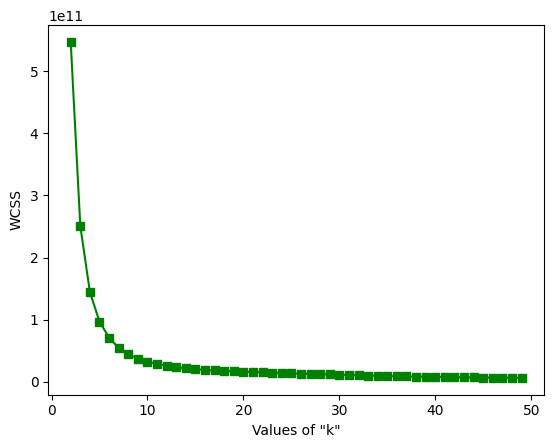

In [21]:
# determining the maximum number of clusters
# using the simple method
limit = int((df.shape[0]//2)**0.5)
 
# selecting optimal value of 'k'
# using elbow method
 
# wcss - within cluster sum of
# squared distances
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(df)
    wcss[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()